In [1]:
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets
/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [3]:
adata=st.read(file_name='/data/Integration_APE_pos_APE_neg/input_matrix_traj.tsv',workdir='/data/Integration_APE_pos_APE_neg')

Saving results in: /data/Integration_APE_pos_APE_neg


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("obs.csv",sep=",",header=0,index_col=0)

In [6]:
adata.obs = df

In [7]:
adata.var_names_make_unique()

In [8]:
st.cal_qc(adata,assay='rna')

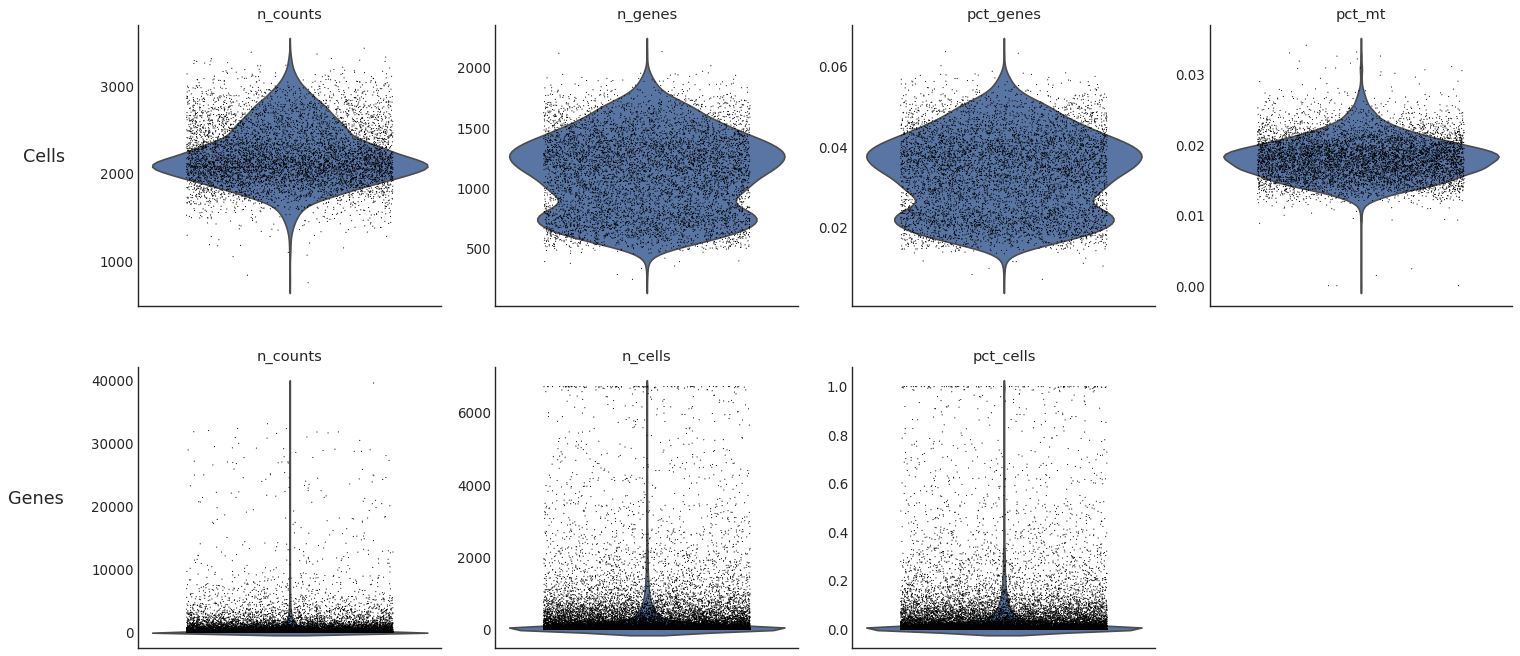

In [9]:
st.plot_qc(adata,jitter=0.3,)

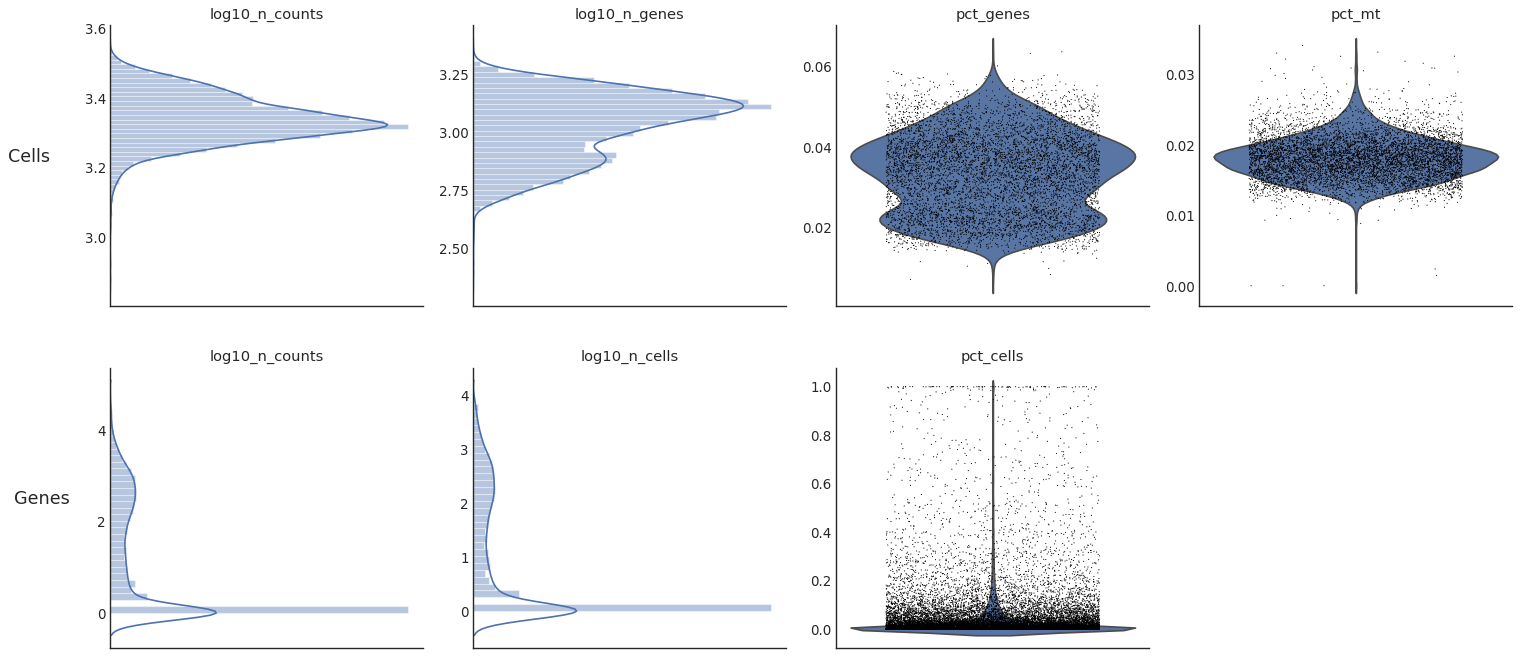

In [10]:
### histogram plots and log-scale are also supported
st.plot_qc(adata,jitter=0.3,log_scale=[0,1,4,5],hist_plot=[0,1,4,5]) 

In [11]:
st.filter_cells(adata,min_n_features= 100)
st.filter_features(adata,min_n_cells = 5)

filter cells based on min_n_features
after filtering out low-quality cells: 
6725 cells, 33538 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
6725 cells, 15438 genes


In [12]:
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
###Remove mitochondrial genes 
st.remove_mt_genes(adata)

remove mitochondrial genes:
['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


772 variable genes are selected


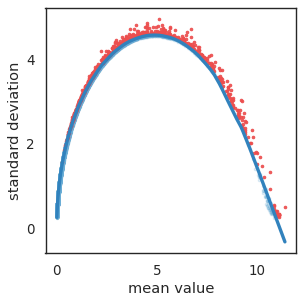

In [13]:
st.select_variable_genes(adata,loess_frac=0.01,percentile=95)

In [14]:
st.dimension_reduction(adata,method='se',feature='var_genes',n_components=2,n_neighbors=15,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


In [15]:
adata.obs['desc_0.4'] = adata.obs['desc_0.4'].astype('category')

In [16]:
import scanpy

adata.rename_categories('desc_0.4', ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8'])

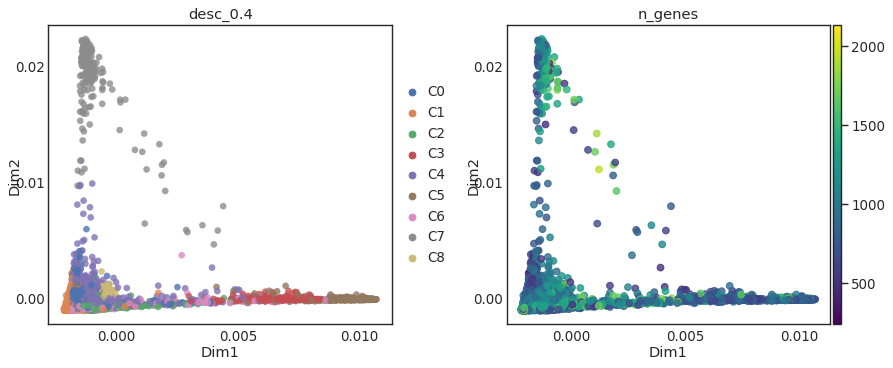

In [17]:
st.plot_dimension_reduction(adata,color=['desc_0.4','n_genes'],
                            n_components=2,show_graph=False,show_text=False)

In [18]:
st.seed_elastic_principal_graph(adata,n_clusters=8)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 8
Calculatng minimum spanning tree...
Number of initial branches: 3


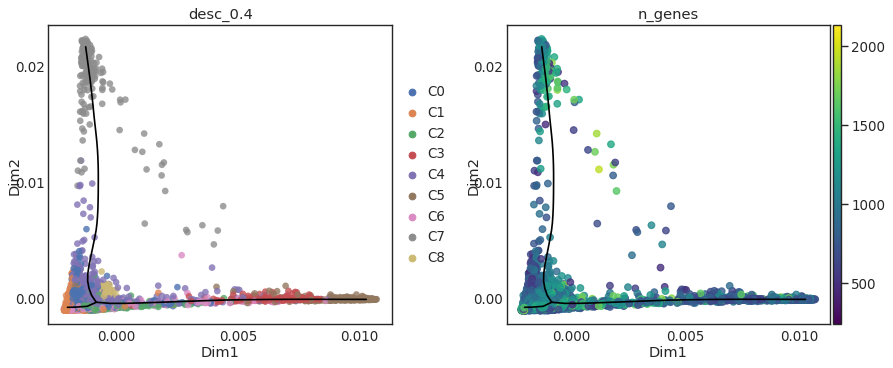

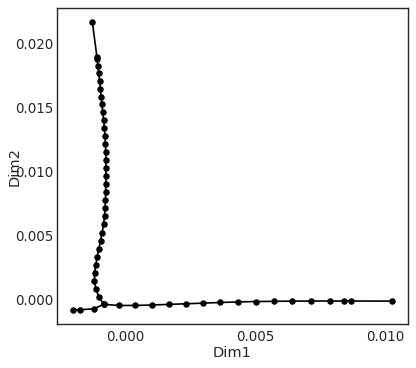

In [43]:
st.plot_dimension_reduction(adata,color=['desc_0.4','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

In [20]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 6725 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
8
 
9
 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
1.245e-06
	
50
	
49
	
46
	
1
	
0
	
0
	
2.743e-07
	
2.551e-07
	
0.9866
	
0.9876
	
9.38e-07
	
3.306e-08
	
1.653e-06
	
8.265e-05
	
0


22.319 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


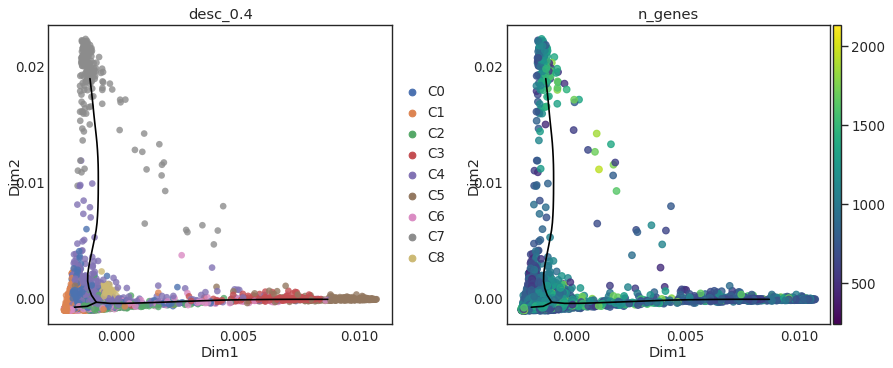

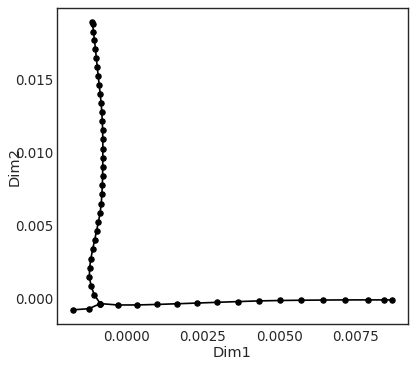

In [21]:
st.plot_dimension_reduction(adata,color=['desc_0.4','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


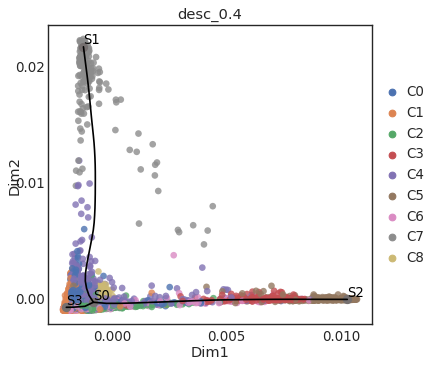

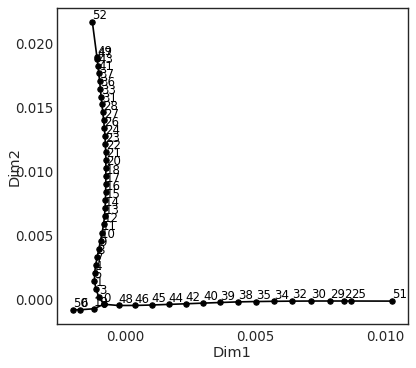

In [22]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['desc_0.4'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

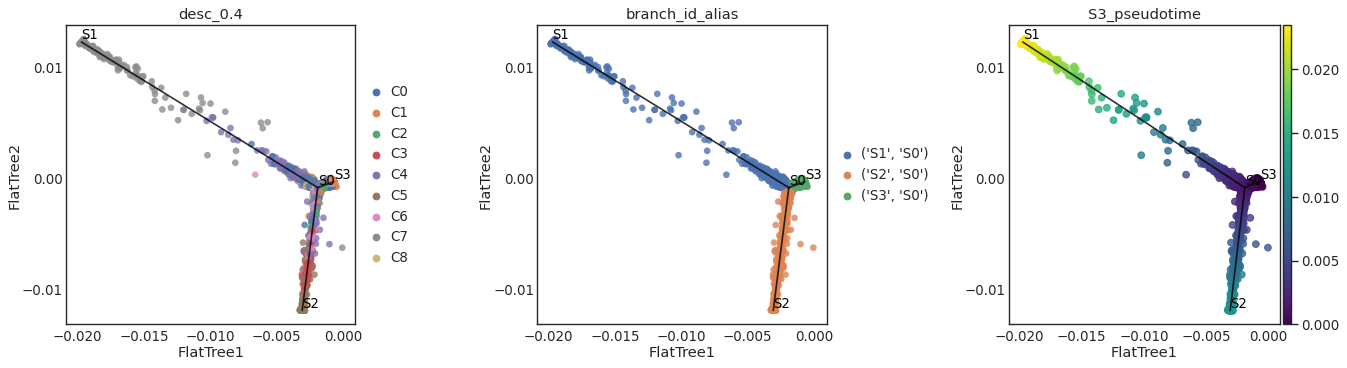

In [23]:
st.plot_flat_tree(adata,color=['desc_0.4','branch_id_alias','S3_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

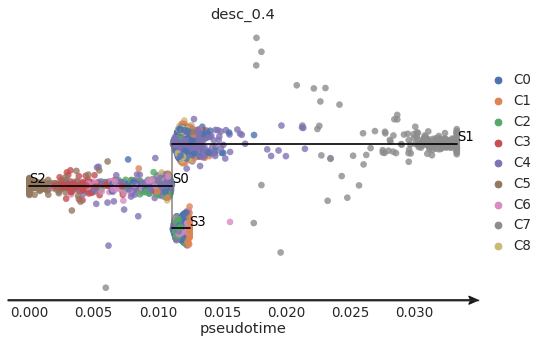

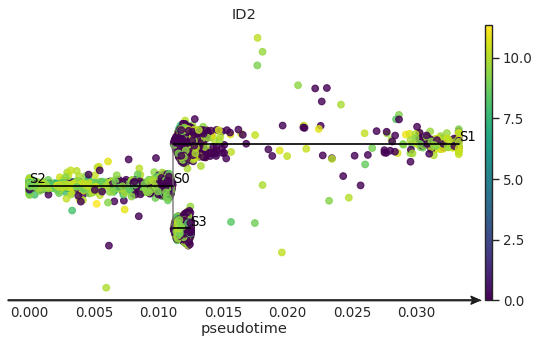

In [39]:
st.plot_stream_sc(adata,root='S2',color=['desc_0.4','ID2'],
                  dist_scale=0.3,show_graph=True,show_text=True)

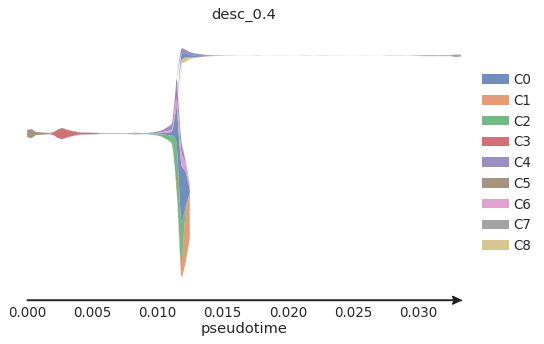

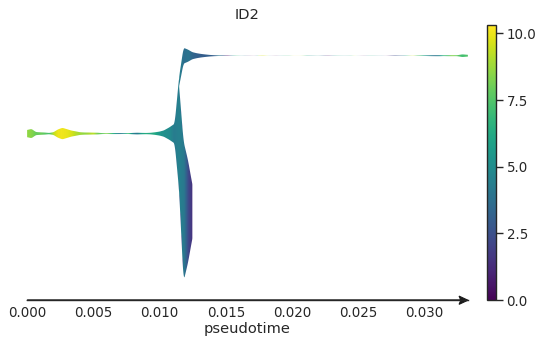

In [38]:
st.plot_stream(adata,root='S2',color=['desc_0.4','ID2'])

In [40]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S2',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
772 markers are being scanned ...


In [41]:
adata.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S2S0_pvalue,S0S1_pvalue,S0S3_pvalue
LGALS2,1.4142,4026.19,0,1,0,0
PHLDA2,1.4142,1509.02,0,1,5.37329e-195,0
BASP1,1.4142,2300.58,0,1,0,0
LYZ,1.41419,2910.8,0,1,0,0
CD83,1.41417,1934.21,0,1,3.40842e-252,0


In [42]:
adata.uns['leaf_markers'][('S3','S0')].head()

KeyError: ('S3', 'S0')

In [ ]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S3',n_jobs=4)

In [ ]:
adata.uns['transition_markers'][('S3','S0')].head()

In [ ]:
st.plot_transition_markers(adata,fig_size=(10,5))

In [32]:
st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S3',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
772 markers are being scanned ...


In [33]:
adata.uns['de_markers_greater'][(('S3', 'S0'), ('S0', 'S1'))].head()

,z_score,U,logfc,mean_up,mean_down,pval,qval
PRSS57,21.452664,2825774.5,1.554938,0.736807,0.250281,4.313469e-102,3.265912e-100
SERPINB1,20.361041,2791864.5,0.633167,0.934692,0.602319,3.707160e-92,2.455994e-90
LAPTM4B,18.462541,2653097.5,1.970326,0.492844,0.125404,4.135229e-76,1.826393e-74
IL1B,17.937218,2586593.5,2.522399,0.381550,0.066095,6.041911e-72,2.463241e-70
AC084033.3,17.552277,2654622.0,1.345507,0.639860,0.251406,5.715463e-69,2.019464e-67


In [34]:
adata.uns['de_markers_less'][(('S0', 'S1'), ('S0', 'S2'))].head()

,z_score,U,logfc,mean_up,mean_down,pval,qval
LGALS2,-29.390341,200560.0,7.412861,0.003000,0.615714,7.305307e-190,2.773479e-187
LYZ,-29.381007,185038.0,3.194021,0.075102,0.692954,9.613447e-190,2.773479e-187
SPI1,-28.515074,189711.5,3.305658,0.073910,0.737376,7.626149e-179,1.466763e-176
COTL1,-28.275350,196736.5,2.828312,0.098973,0.707268,6.953667e-176,1.003066e-173
CPVL,-27.698821,223074.0,4.634055,0.023228,0.590861,7.221946e-169,8.334126e-167


In [ ]:
st.plot_de_markers(adata)

In [ ]:
st.detect_markers(adata,ident='desc_0.4',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)

In [37]:
st.write(adata,file_name='stream_result.pkl')